# MANUEL PANTALEO, 59705 

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 13-October-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [5]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?. In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


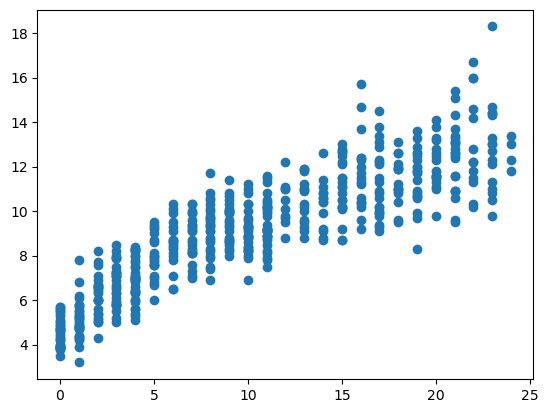

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


In [6]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
import numpy as np
from sklearn import linear_model  
import matplotlib.pyplot as plt

x_feature = dataDF[['age']]
y_labels = dataDF[['weight']]

plt.scatter(x_feature, y_labels)
plt.show()

correlation_matrix = dataDF[['age', 'weight']].corr()
correlation_matrix

**Comment:** As we can see that is strong positive correlation between age and weight of these children taken under consideration. The correlation value is very close to 1, which suggests a strong positive linear relationship between these two variables. In other words when one variable increases, the other variable tends to increase as well, and vice versa. In this context, it implies that as people age, their average weight tends to increase, which is a common observation. Given this correlation value it is more than reasonable to create a linear regression model.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [7]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

seed = 40
train_set, test_set = train_test_split(dataDF, test_size=0.2, random_state=seed)

x_train = train_set[['age']]
y_train = train_set[['weight']]

x_test = test_set[['age']]
y_test = test_set[['weight']]

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

model_type = linear_model.LinearRegression()
estimate_error = cross_val_score(model_type, x_feature, y_labels, scoring='neg_mean_squared_error', cv=10).mean()

print(estimate_error)

-1.6362454439449432


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

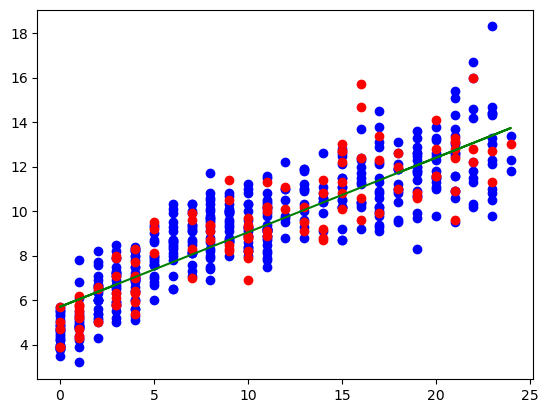

theta0 =  [5.70254107]
theta1 =  [[0.3348116]]
y = 0.33*Age + 5.70


In [8]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
predictions_train = model.predict(x_train)

plt.scatter(x_train, y_train, color='b', label='Training Data')

plt.scatter(x_test, y_test, color='r', label='Test Data')

plt.plot(x_train['age'], predictions_train, color='green', label='Regression Model')

plt.show()

intercept = model.intercept_
slope = model.coef_
print('theta0 = ', intercept)
print('theta1 = ', slope)
print("y = 0.33*Age + 5.70")

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (7 out of 20)

In [9]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
from sklearn.preprocessing import PolynomialFeatures

seed = 10
def trans_data(degree, input):
    polynomial_features = PolynomialFeatures(degree)
    
    poly_trans = polynomial_features.fit_transform(input)
    input_df = pd.DataFrame(poly_trans)
    return input_df
model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11, 1)})

df['test_error'] = df['degree'].apply(lambda degree: cross_val_score(model, trans_data(degree, x_feature), y_labels, scoring='neg_mean_squared_error', cv = 10).mean())
df.sort_values('test_error', ascending=False)


,degree,test_error
9,10,-1.400843
7,8,-1.407285
2,3,-1.409529
3,4,-1.412721
8,9,-1.413346
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


In [10]:
a = -1.400843 > -1.636245
a

True

**Comment:** In this case the degree that results in the lowest test error is 10. Thus, this degree would likely result in a better model. However, it is important to consider overfitting which usually occur with high-degree polynomials.

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (3 points out of 20)

In [11]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed)

x_train = train_set[['age']]
y_train = train_set[['weight']]

x_test = test_set[['age']]
y_test = test_set[['weight']]

model = linear_model.LinearRegression()
model.fit(trans_data(10, x_train), y_train)

print ('theta0 = ', model.intercept_)
print ('theta1 = ', model.coef_)

theta0 =  [4.62776676]
theta1 =  [[ 0.00000000e+00 -3.52431505e-01  1.69351607e+00 -9.86051631e-01
   2.85323631e-01 -4.70433244e-02  4.67737406e-03 -2.85208021e-04
   1.04264091e-05 -2.09635342e-07  1.78162388e-09]]
